In [1]:
#import necessary libraries
from fastai import *
from fastai.vision import *



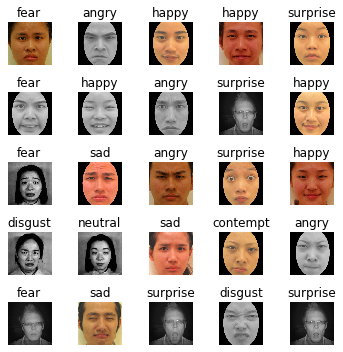

In [24]:
path = datapath4file('sorted')


#fnames = get_image_files(path)
#fnames
#AN, SA, SU, DI, NE, HA, FE
path.ls()
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, valid_pct=0.2, size=224)
data.show_batch(row=3, figsize=(5,5))


In [25]:
#label = r'([A-Z]{2})\B';
#data = ImageDataBunch.from_name_re(path, fnames, label, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

print(data.classes)

['angry', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [26]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
#learn.fit_one_cycle(4)

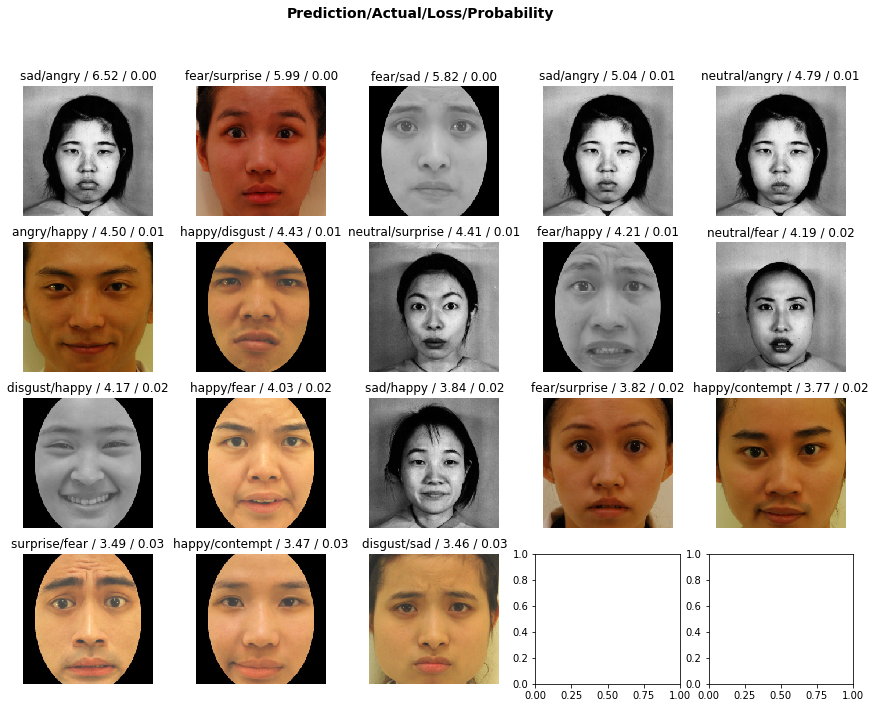

In [27]:
learn.fit_one_cycle(2)
#learn.save('first_test_JAFFEETFEID')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(18, figsize=(15,11))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


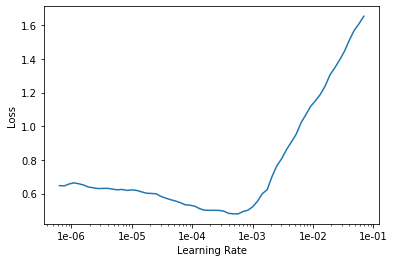

In [28]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [30]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-04, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.376632,1.116117,0.217391,00:25
1,0.443372,1.230722,0.197628,00:25
2,0.312235,0.277687,0.071146,00:25


In [31]:
learn.save("resnet50acc93")
learn.export()
path = datapath4file('sorted')

learn = load_learner(path)

In [32]:
path
#img = open_image("AF35HAS.JPG")
#learn.predict(img)
#help(learn.predict)

PosixPath('/home/jupyter/.fastai/data/sorted')

In [14]:
learn.load("resnet50acc85")

Learner(data=ImageDataBunch;

Train: LabelList (1400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
anger,anger,anger,anger,anger
Path: /home/jupyter/.fastai/data/zip;

Valid: LabelList (350 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
happiness,sadness,disgust,sadness,fear
Path: /home/jupyter/.fastai/data/zip;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, 

In [20]:
learn.export()


FileNotFoundError: [Errno 2] No such file or directory: '~/.fastai/data/zip/export.pkl'

In [27]:
path = datapath4file('zip')
#path
learn = load_learner(path)

In [28]:
path

PosixPath('/home/jupyter/.fastai/data/zip')